**Based on the given data we have to determine weather a person is eligible for loan or not.**

In [86]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Libraries for model evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score

#importing models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression




In [3]:
#Loading data
data = pd.read_csv('train_loan.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Preprocessing

In [4]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
data.shape

(614, 13)

In [7]:
# Determining weather null values are present in the data
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [58]:
# Using Random Imputation to add Gender to the nan values
missing_gender_index = data[data['Gender'].isna()].index

data.loc[missing_gender_index, 'Gender'] = np.random.choice(data.Gender.value_counts().index, 
                                                           size=len(missing_gender_index),
                                                            p=data['Gender'].value_counts().values / data.Gender.value_counts().sum()
                                                           )
#Using mode imputation for Married
data.Married.fillna("Yes",inplace=True)

#Using mode imputation for Dependents column
data.Dependents.fillna(0, inplace=True)

# Using random imputation for Self_Employed column
missing_self_employment_index = data[data.Self_Employed.isna()].index

data.loc[missing_self_employment_index, 'Self_Employed'] = np.random.choice(data.Self_Employed.value_counts().index, 
                                                           size=len(missing_self_employment_index),
                                                            p=data['Self_Employed'].value_counts().values / data.Self_Employed.value_counts().sum()
                                                           )

#Filling loan amount missing values with mean
data['LoanAmount'].fillna(data.LoanAmount.mean(), inplace=True)

#Filling CreditHistory with mean
data['Credit_History'].fillna(data.Credit_History.mean(), inplace=True)

#Filling Loan_Amount_Term with mode
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mode()[0], inplace=True)


In [59]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [78]:
# Label encoding the non numerical features
data.Gender = data.Gender.replace({'Male':1, 'Female':0})
data.Married = data.Married.replace({'Yes':1, 'No':0})
data.Dependents = data.Dependents.replace({'0':0, '1':1, '2':2,'3+':3})
data.Education = data.Education.replace({'Graduate':1, 'Not Graduate':0})
data.Self_Employed = data.Self_Employed.replace({'Yes':1, 'No':0})
data.Property_Area = data.Property_Area.replace({'Urban':1, 'Rural':2, 'Semiurban':3})
data.Loan_Status = data.Loan_Status.replace({'Y':1, 'N':0})




In [79]:
data.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [80]:
# Dropping the loanid column
data.drop('Loan_ID', axis=1, inplace= True)

### Data Visualisation

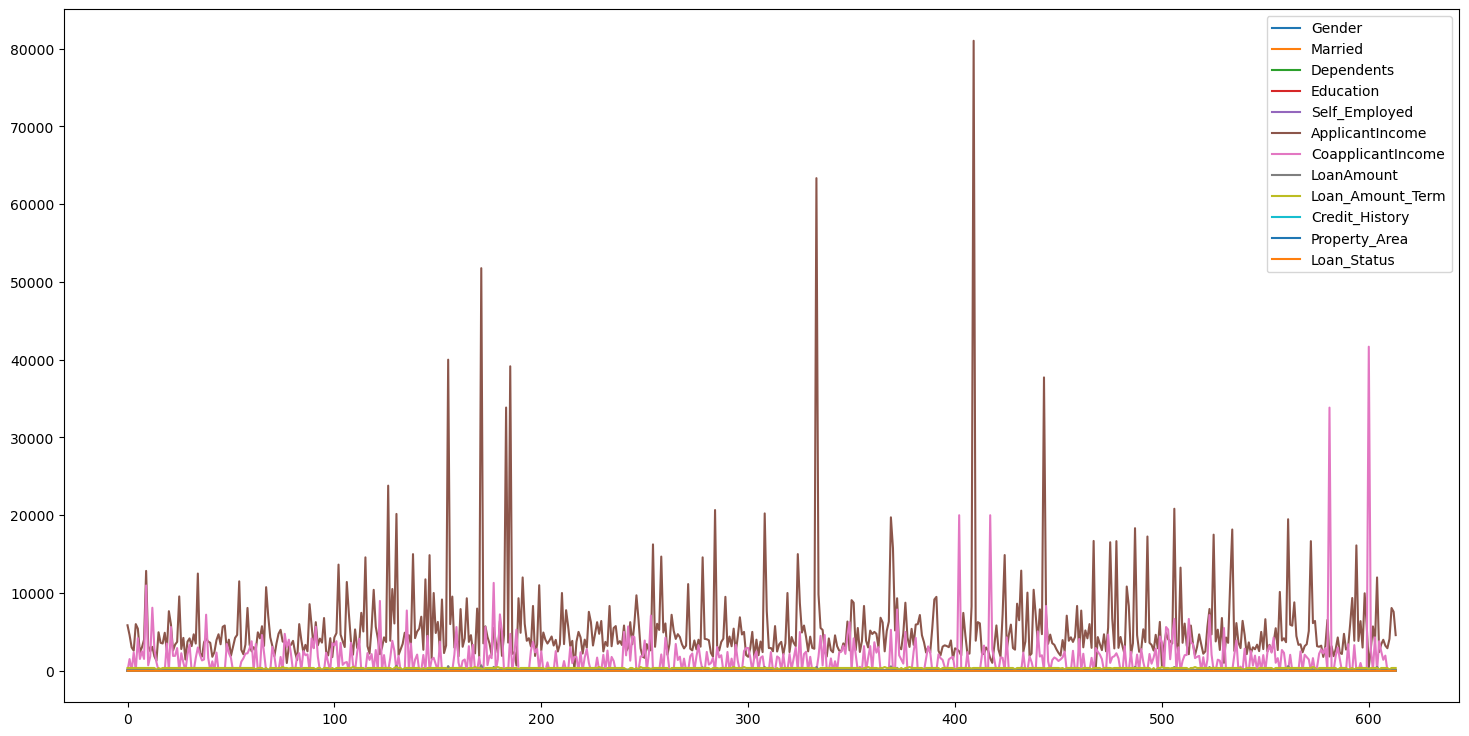

In [81]:
data.plot(figsize=(18,9));

Text(0.5, 1.0, 'Loan Amount')

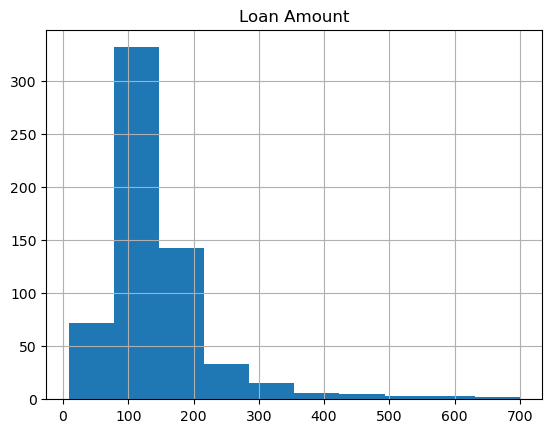

In [82]:
data.LoanAmount.hist(bins=10)
plt.title("Loan Amount")

[Text(0.5, 1.0, 'Loan Amount vs Applicant Income'),
 Text(0.5, 0, 'Loan Amount'),
 Text(0, 0.5, 'Applicant Income')]

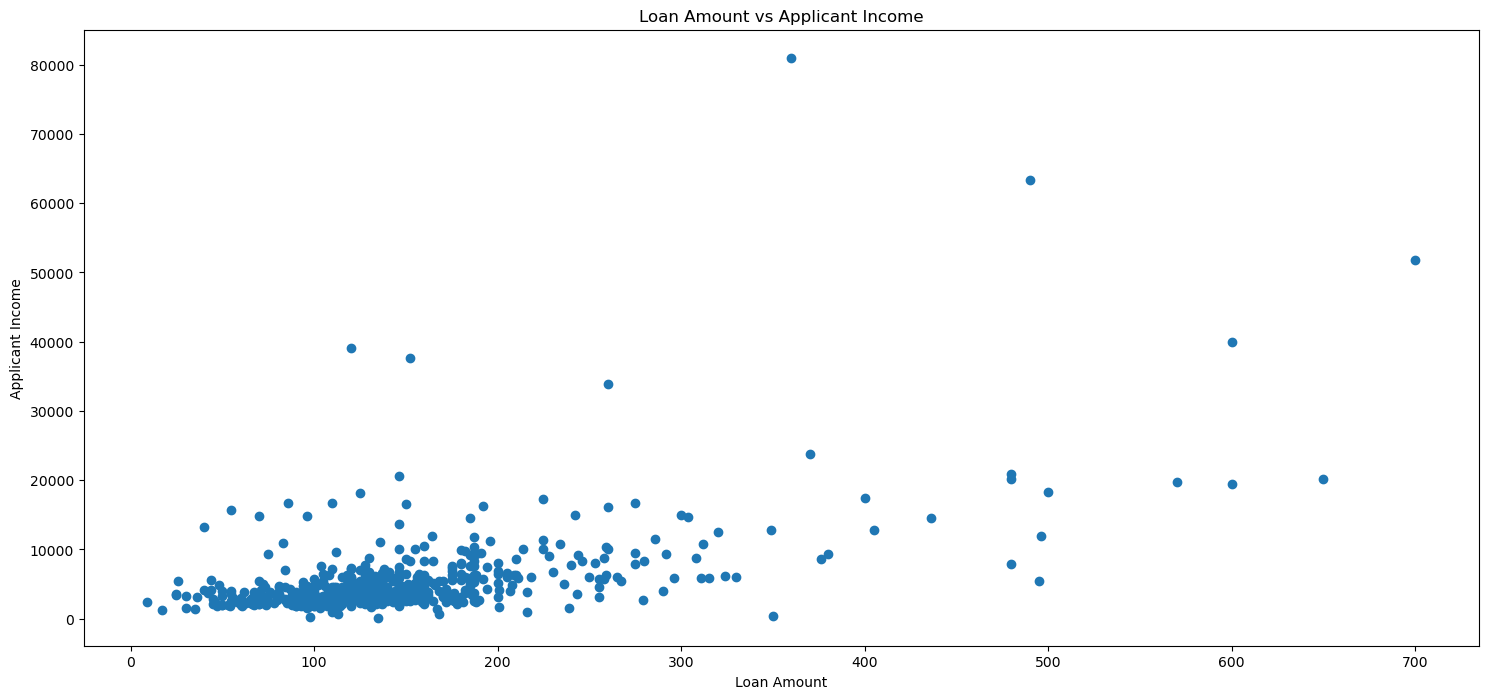

In [83]:
fig, ax = plt.subplots(figsize=(18,8))
ax.scatter(data.LoanAmount, data.ApplicantIncome)
ax.set(title="Loan Amount vs Applicant Income", xlabel="Loan Amount", ylabel="Applicant Income")



### Modelling

In [85]:
# Splitting to x and y
x = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

#Splitting into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [92]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
lr_accuracy = accuracy_score(y_test, y_pred)
lr_precison = precision_score(y_test, y_pred)

/opt/anaconda3/envs/mlenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [93]:
lr_accuracy, lr_precison

(0.8292682926829268, 0.8285714285714286)

In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.45      0.59        33
           1       0.83      0.97      0.89        90

    accuracy                           0.83       123
   macro avg       0.83      0.71      0.74       123
weighted avg       0.83      0.83      0.81       123



In [96]:
# Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)
y_pred = rf_clf.predict(x_test)
rf_accuracy = accuracy_score(y_test, y_pred)
rf_precsion = precision_score(y_test, y_pred)
print(f"Accuracy score of Random Forest Classifier : {rf_accuracy}")
print(f"Precison score of Random Forest Classifer : {rf_precsion}")
print(classification_report(y_test, y_pred))

Accuracy score of Random Forest Classifier : 0.7804878048780488
Precison score of Random Forest Classifer : 0.8315789473684211
              precision    recall  f1-score   support

           0       0.61      0.52      0.56        33
           1       0.83      0.88      0.85        90

    accuracy                           0.78       123
   macro avg       0.72      0.70      0.71       123
weighted avg       0.77      0.78      0.77       123



In [97]:
# Ada BoostClassifier with Logistic Regression as base
ada_classifier = AdaBoostClassifier(n_estimators=50, base_estimator=LogisticRegression(), random_state=42)
ada_classifier.fit(x_train, y_train)
y_pred = ada_classifier.predict(x_test)
ada_accuracy = accuracy_score(y_test, y_pred)
ada_precsion = precision_score(y_test, y_pred)
print(f"Accuracy score of AdaBoost Classifier : {ada_accuracy}")
print(f"Precison score of AdaBoost Classifer : {ada_precsion}")
print(classification_report(y_test, y_pred))

Accuracy score of AdaBoost Classifier : 0.7642276422764228
Precison score of AdaBoost Classifer : 0.7652173913043478
              precision    recall  f1-score   support

           0       0.75      0.18      0.29        33
           1       0.77      0.98      0.86        90

    accuracy                           0.76       123
   macro avg       0.76      0.58      0.58       123
weighted avg       0.76      0.76      0.71       123



/opt/anaconda3/envs/mlenv/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [100]:
# Ada Boost Classifer with decison tree base estimator
ada_default_classifier = AdaBoostClassifier(n_estimators=50,  random_state=42)
ada_default_classifier.fit(x_train, y_train)
y_pred = ada_default_classifier.predict(x_test)
ada_def_accuracy = accuracy_score(y_test, y_pred)
ada_def_precision = precision_score(y_test, y_pred)
print(f"Accuracy score of AdaBoost Classifier(Default) : {ada_def_accuracy}")
print(f"Precison score of AdaBoost Classifer(Default) : {ada_def_precision}")
print(classification_report(y_test, y_pred))

Accuracy score of AdaBoost Classifier(Default) : 0.7804878048780488
Precison score of AdaBoost Classifer(Default) : 0.8387096774193549
              precision    recall  f1-score   support

           0       0.60      0.55      0.57        33
           1       0.84      0.87      0.85        90

    accuracy                           0.78       123
   macro avg       0.72      0.71      0.71       123
weighted avg       0.77      0.78      0.78       123



In [101]:
# Gradient Boost Classifier with default decision tree classifier
gb_clf = GradientBoostingClassifier(n_estimators=50, random_state=42)
gb_clf.fit(x_train, y_train)
y_pred = gb_clf.predict(x_test)
gb_clf_def_accuracy = accuracy_score(y_test, y_pred)
gb_clf_def_precision = precision_score(y_test, y_pred)
print(f"Gradient boost classifier default accuracy : {gb_clf_def_accuracy}")
print(f"Gradient boost classifier default accuracy : {gb_clf_def_precision}")
print(classification_report(y_test, y_pred))


Gradient boost classifier default accuracy : 0.7560975609756098
Gradient boost classifier default accuracy : 0.8061224489795918
              precision    recall  f1-score   support

           0       0.56      0.42      0.48        33
           1       0.81      0.88      0.84        90

    accuracy                           0.76       123
   macro avg       0.68      0.65      0.66       123
weighted avg       0.74      0.76      0.74       123



In [107]:
# Xgboost Classifier
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_clf.fit(x_test, y_test)
y_pred = xgb_clf.predict(x_test)
y_pred = gb_clf.predict(x_test)
xgb_clf_def_accuracy = accuracy_score(y_test, y_pred)
xgb_clf_def_precision = precision_score(y_test, y_pred)
print(f"XG boost classifier default accuracy : {xgb_clf_def_accuracy}")
print(f"XG boost classifier default accuracy : {xgb_clf_def_precision}")
print(classification_report(y_test, y_pred))


XG boost classifier default accuracy : 0.7560975609756098
XG boost classifier default accuracy : 0.8061224489795918
              precision    recall  f1-score   support

           0       0.56      0.42      0.48        33
           1       0.81      0.88      0.84        90

    accuracy                           0.76       123
   macro avg       0.68      0.65      0.66       123
weighted avg       0.74      0.76      0.74       123



**The number of false positives should be minimum so we are taking the model with higher precison. We have AdaBoostClassifier with highest precison.**

In [113]:
# Hyper parameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5],
    'estimator': [None, DecisionTreeClassifier(max_depth=1), RandomForestClassifier()]
}
ada_classifier = AdaBoostClassifier()
grid_search = GridSearchCV(ada_classifier, param_grid, cv=5, scoring='precision', verbose=2)
grid_search.fit(x, y)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END estimator=None, learning_rate=0.01, n_estimators=50; total time=   0.1s
[CV] END estimator=None, learning_rate=0.01, n_estimators=50; total time=   0.0s
[CV] END estimator=None, learning_rate=0.01, n_estimators=50; total time=   0.0s
[CV] END estimator=None, learning_rate=0.01, n_estimators=50; total time=   0.0s
[CV] END estimator=None, learning_rate=0.01, n_estimators=50; total time=   0.0s
[CV] END estimator=None, learning_rate=0.01, n_estimators=100; total time=   0.1s
[CV] END estimator=None, learning_rate=0.01, n_estimators=100; total time=   0.1s
[CV] END estimator=None, learning_rate=0.01, n_estimators=100; total time=   0.1s
[CV] END estimator=None, learning_rate=0.01, n_estimators=100; total time=   0.1s
[CV] END estimator=None, learning_rate=0.01, n_estimators=100; total time=   0.1s
[CV] END estimator=None, learning_rate=0.01, n_estimators=150; total time=   0.1s
[CV] END estimator=None, learning_rate=0.

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'estimator': [None,
                                       DecisionTreeClassifier(max_depth=1),
                                       RandomForestClassifier()],
                         'learning_rate': [0.01, 0.1, 0.5],
                         'n_estimators': [50, 100, 150]},
             scoring='precision', verbose=2)

In [114]:
grid_search.best_params_

{'estimator': None, 'learning_rate': 0.5, 'n_estimators': 50}

In [117]:
tuned_ada_clf = AdaBoostClassifier(learning_rate=0.5, n_estimators=50)
tuned_ada_clf.fit(x_train, y_train)
y_pred = tuned_ada_clf.predict(x_test)
precision_score(y_test, y_pred)

0.8217821782178217

In [118]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.45      0.55        33
           1       0.82      0.92      0.87        90

    accuracy                           0.80       123
   macro avg       0.75      0.69      0.71       123
weighted avg       0.78      0.80      0.78       123

